# Chapter1: 分類問題

## 1.1 回帰と分類

[○○章]()では回帰問題について扱った．

回帰問題は数値を予測するのに対して，分類問題ではデータのクラス（カテゴリ）を予測する．

つまり，ある入力ベクトル $\mathbf x$ を $K$ 個の離散クラス $C_k (k=1,\dots , K)$ に割り当てることが，分類問題の目的である．

ここで、$K=2$ のとき二値分類，$K>2$ のとき多値分類と呼ぶ．

本章では，二値分類として[ロジスティック回帰モデル](#1.2)および[SVM（Support Vector Machine）](#1.4)を，多値分類として[多クラスロジスティック回帰](#1.3)を取り上げる．

## 1.2 ロジスティック回帰モデル
<a id="1.2"></a>

ロジスティック回帰モデルは回帰モデルを分類問題に応用したモデルである．

そのため、基本的な考え方は線形回帰と同様であり，入力ベクトル $\mathbf x$ と重みベクトル $\mathbf w$ の線形和 $\mathbf w^{\mathrm T} \mathbf x + w_0$ を計算する．

ただし，ロジスティック回帰では，予測クラスの確率を計算するため，出力の範囲を $0$ 以上 $1$ 以下に制限する必要がある．

そのため，シグモイド関数を用いることで，出力を $0$ から $1$ の間に抑えることができる． 

- シグモイド関数
$$ \sigma(x) = \frac{1}{1 + \exp^{-x}} \tag{1.1}$$

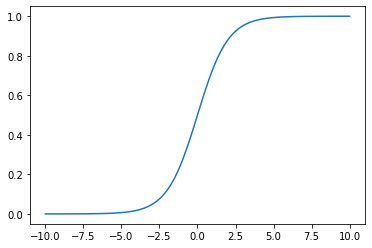

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# シグモイド関数
def sigmoid(x):
    y = 1 / (1 + math.e**(-x))
    return y

x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

### 1.2.1 ロジスティック回帰の定式化

- データ集合：$\{\mathbf x_n, t_n\}$, $t_n \in \{0,1\}$

$n=1, \dots, N$ に対する尤度関数は以下のように書くことができる．

$$ p(\mathbf t | \mathbf w) = \prod_{n=1}^{N} y_n^{t_n} \{ 1-y_n \}^{1-t_n} \tag{1.2}$$

ここで, $ \mathbf t = (t_1, \dots, t_N)^{\mathrm T} $，$y_n = p(C_1|x_n)$ である．

ロジスティック回帰では，$p(C_1|x_n) >= 0.5$ であれば $t_n = C_1$，$p(C_1|x_n) < 0.5$ であれば $t_n = C_2$ となる．

尤度の負の対数をとると，以下の誤差関数を定義することができる．

この誤差関数は，公差エントロピー誤差関数と呼ばれる．

$$ E(\mathbf w) = -\ln p(\mathbf t | \mathbf w) = -\sum_{n=1}^{N} \{ t_n \ln y_n + (1-t_n) \ln (1-y_n) \}  \tag{1.3}$$

### 1.2.2 データセットの準備

今回は irisデータセット(「あやめ」という花の形状データ)を用いる

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# irisデータセットの読み込み
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['Species'])
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


iris データセットには，あやめの
- sepal length (がくの長さ)
- sepal width (がくの幅)
- petal length (花弁の長さ)
- petal width (花弁の幅)
- Species (品種：setosa、versicolor、virginica)

の情報がある．

今回は，petal length，petal width を用いて品種(setosa、versicolor)を分類するロジスティック回帰モデルを構築する．

ここで，Species=0 が setosa，Species=1 が versicolor である．

### 1.2.3 データ前処理

In [4]:
# 品種 setosa、versicolorを抽出
df = df[(df['Species']==0) | (df['Species']==1)]
# 説明変数
X = df.iloc[:, [2,3]]
# 目的変数
y = df.iloc[:, 4]
# 学習データと検証データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 1.2.4 モデル定義，学習

In [5]:
model = LogisticRegression()
# 学習
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 1.2.5 学習結果の確認

In [6]:
from sklearn import metrics
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


訓練データで学習した多クラスロジスティック回帰モデルを，テストデータで精度を評価すると，100%という結果を得ることができた．

以下で，データ点および決定境界を図示し，精度100％の分類が行えているか確認してみる．

In [7]:
# 切片
print(model.intercept_)
# 傾き
print(model.coef_)

[-7.3018626]
[[2.41092643 1.01214654]]


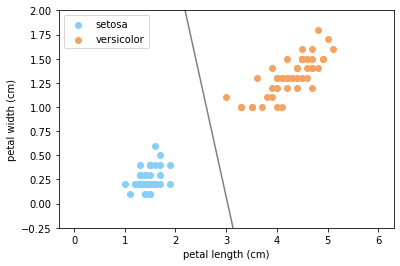

In [8]:
w_0 = model.intercept_
w_1 = model.coef_[0, 0]
w_2 = model.coef_[0, 1]

x1 = np.linspace(0, 6, 30)
x2 = (-w_1 * x1 - w_0) / w_2
# 決定境界およびデータ点を描画
plt.plot(x1, x2, color='gray')
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], color='lightskyblue', label=data.target_names[0])
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], color='sandybrown', label=data.target_names[1])
plt.ylim(-0.25, 2)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

## 1.3 多クラスロジスティック回帰モデル
<a id="1.3"></a>

[1.2](#1.2)節では二値分類を行った．
本節では，先ほどと同様の iris データセットを用いて，多クラス分類をロジスティック回帰を用いて行う．

二値分類におけるロジスティック回帰モデルを，多クラスに応用する方法は以下の通りである．

1. [One VS Rest](#1.3.1)

2. [多項ロジスティック回帰](#1.3.2)

### 1.3.1 One VS Rest
<a id="1.3.1"></a>

この手法は，ロジスティック回帰に限らず，他の二値分類アルゴリズムを多値分類に応用する際に適用することができる．

二値分類のモデルを，クラス数定義し，それらの分類器のうち最も高い確率のクラスを予測結果とする．

例えば，犬・猫・虎を分類対称のクラスとすると，One VS Rest では，以下の3つの分類器を構築します．

1. 犬 vs その他（猫・虎）を分類する分類器
2. 猫 vs その他（犬・虎）を分類する分類器
3. 虎 vs その他（犬・猫）を分類する分類器

しかし，データ数や分類対称のクラス数が多い場合や，複雑な分類アルゴリズムの場合では，多大な学習コストを要することになる．

### 1.3.2 多項ロジスティック回帰
<a id="1.3.2"></a>

この手法は，二値分類用のロジスティック回帰を多値分類用に拡張したモデルである．

式(1.3)は二値分類用の損失関数であったので，これを工夫する必要があります．

二値分類では，目的変数を 0/1 のと変換してシグモイド関数を適用していましたが，多クラスの場合は同様にはできません．

そこで，1-of-K 符号化というものを用います．

- 1-of-K 符号化

$$
t_{nk} = 
\left\{
\begin{align*}
1,\,\,  \ & k_n=k \\
0,\,\,  \ & otherwise
\end{align*}
\right.
\tag{1.4}
$$

クラス $C_k$ に属する特徴ベクトルに対する目的変数ベクトル $t_n$ が $k$ 番目の要素が $1$ でそれ以外の要素がすべて $0$ となるような符号化法である

二値分類では式(1.1)のシグモイド関数を使用しましが，多値分類ではソフトマックス関数を使用します．

- ソフトマックス関数
$$ 
p_k(x) = \frac{\exp^{x_k}}{\exp^{x_1} + \exp^{x_2} + \dots + \exp^{x_K}} = \frac{\exp^{x_k}}{\sum_{k=1}^{K}\exp^{x_i}}
\tag{1.5} $$

そして、このとき尤度関数は以下のように定義することができる．

$$
p(\mathbf T | \mathbf w_1, \dots, \mathbf w_K) = \prod_{n=1}^{N}\prod_{k=1}^{K} p(C_k | \mathbf x_n)^{t_{nk}} = \prod_{n=1}^{N}\prod_{k=1}^{K} y_{nk}^{t_nk}
\tag{1.6}
$$

先ほどと同様に，負の対数をとると以下の多値分類に対する公差エントロピー誤差関数を得ることができる

$$
E(\mathbf w_1, \dots, \mathbf w_K)) = -\ln p(\mathbf T | \mathbf w_1, \dots, \mathbf w_K) = -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{nk} \ln y_{nk}
\tag{1.7}
$$

### 1.3.3 データセットの準備

In [9]:
# irisデータセットの読み込み
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['Species'])
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### 1.3.4 データ前処理

今回は，sepal length，sepal width，petal length，petal width を用いて品種（setosa、versicolor，virginica）を分類するロジスティック回帰モデルを構築する．

In [11]:
# 学習データと検証データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 1.3.5 モデル定義，学習

In [12]:
model = LogisticRegression()
# 学習
model.fit(X_train, y_train)

C:\Users\n_hrk928011\anaconda3.2020.02\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\n_hrk928011\anaconda3.2020.02\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 1.3.6 精度評価

In [13]:
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


訓練データで学習した多クラスロジスティック回帰モデルを，テストデータで精度を評価すると，約97.4%という結果を得ることができた．

## 1.4 サポートベクターマシン（SVM：Support Vector Machine)
<a id="1.4"></a>

これまでロジスティック回帰について述べてきたが，ここでは分類問題のその他のアルゴリズムとして，SVM を紹介する．

SVM は，教師あり学習の二値分類モデルである．

ただし， SVM の回帰問題や多値分類問題への応用も存在する.

SVM は以下の識別境界で入力ベクトルを分離する．

$$ y(\mathbf x) = \mathbf w^{\mathrm T} \mathbf x + b 
\tag{1.8}$$

以下は，データ点と識別境界を図示したものであるが，どちらの識別境界が最適でしょうか？

どちらもクラスタを適切に分離していますが，右図が最適な識別境界である．

SVM ではサポートベクトルと識別境界の距離（マージン）を最大化するように，学習を行う．

<table><tr>
    <td><img src="figs/svm1.png" width="80%"></td>
    <td><img src="figs/svm2.png" width="80%"></td>
</tr></table>

ここでラベル変数を以下のように定義する

$$
t_i = 
\left\{
\begin{align*}
1,\,\,  \ & \mathbf w^{\mathrm T}x_i + b > 0 \\
-1,\,\,  \ & \mathbf w^{\mathrm T}x_i + b < 0
\end{align*}
\right.
\tag{1.9}
$$

さらに，すべてのデータ点は線形分離可能と仮定すると，以下の条件を満たす.

$$ t_n (\mathbf w^{\mathrm T}\mathbf x_n + b) > 0 
\tag{1.10}$$

したがって，識別境界から点 $\mathbf x_n$ までの距離は以下のように表すことができる．

$$
\frac{t_n(\mathbf w^{\mathrm T}\mathbf x_n + b)}{||\mathbf w||}
\tag{1.11}
$$

マージンは，訓練データと分類協会の最短距離であり，SVM は，そのマージンを最大化することが目的である．

つまり，以下の最適化問題を解くことで最適な識別境界を得ることができる．

$$
\underset{\mathbf w,\, b}{\mathrm{argmax}}
\left\{
\frac{1}{||\mathbf w||}
\underset{n}{\mathrm{min}}
[ t_n(\mathbf w^{\mathrm T} \mathbf x_n + b) ]
\right \}
\tag{1.12}
$$

### データセットの準備

今回は， scikit-learn の make_blobs で訓練データを生成し，それを使用する．

- centers：クラスターの数
- n_samples：サンプル数
- n_features：特徴量の数
- cluster_std：クラスター分布の標準偏差

In [14]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(centers=2, n_samples=1000, n_features=5, cluster_std=5, random_state=121)

In [15]:
# 学習データと検証データを分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
# データを標準化するための準備
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
# モデル定義
# transformで標準化を行い，学習
from sklearn.svm import SVC
clf = SVC(max_iter=100)
clf.fit(scaler.transform(X_train), y_train)

C:\Users\n_hrk928011\anaconda3.2020.02\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=100, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
# テストデータも標準化を実行し，predict(予測)を行う
y_pred = clf.predict(scaler.transform(X_test))

In [19]:
#正解率を算出
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.93

テストデータで学習済みSVMを評価すると，約93%という正解率を得ることができた．